In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
from scipy import signal, stats, optimize, io
import seaborn as sns
import windrose

D:\Nick\Miniconda3\lib\site-packages\windrose\windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
D:\Nick\Miniconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
D:\Nick\Miniconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
D:\Nick\Miniconda3\lib\site-packages\windrose\windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  return lambd

# Intro: Working with Time Series Data in Pandas and Numpy
## Reading, Selecting, Filtering, Visualizing, and Modeling


# Wind Data Analysis Example

Data Source: https://www.kaggle.com/berkerisen/a-wind-turbine-power-curve-control

From the Kaggle Project: "2018 Scada Data of a Wind Turbine in Turkey"

[**CSV Direct Download Link**](https://www.kaggle.com/berkerisen/wind-turbine-scada-dataset/download/E2KY6QoIAX2pdNu9dvl9%2Fversions%2FnOKknT8uY78EOqN3DJsH%2Ffiles%2FT1.csv?datasetVersionNumber=3)

## Loading the Data

Why use this dataset?  Because it's simple to load and simple to understand, even for me.  Ideally, all of our data will be that way; later on in this session, we'll discuss the technical challenges and tools available for simplifying datasets.

### Load from CSV

In [2]:
df = pd.read_csv('T1.csv')
df.rename(columns={
    'Date/Time': 'Timestamp', 
    'LV ActivePower (kW)':'ActivePower(kW)', 
    "Wind Speed (m/s)":"WindSpeed(m/s)",
    "Wind Direction (°)":"Wind_Direction",
    'Theoretical_Power_Curve (KWh)': 'TheoreticalPower(kW)',
},
                inplace=True)
df.head()

,Timestamp,ActivePower(kW),WindSpeed(m/s),TheoreticalPower(kW),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286



## Visualizing the Data


## Wind Rose

https://windrose.readthedocs.io/en/latest/usage.html

!pip install windrose

#### Interface 1: Matplotlib Axis

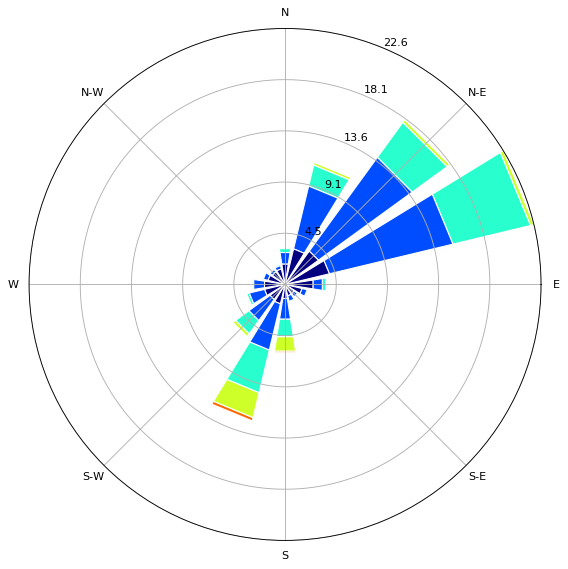

In [3]:
from windrose import WindroseAxes
ax = WindroseAxes.from_ax()
ax.bar(df['Wind_Direction'], df['WindSpeed(m/s)'], normed=True, opening=0.8, edgecolor='white');

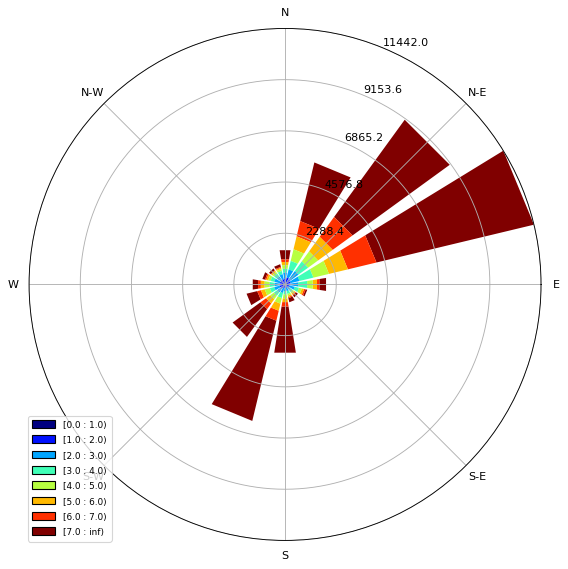

In [4]:
from windrose import plot_windrose
dftemp = df.rename(columns={'WindSpeed(m/s)': 'speed', 'Wind_Direction': 'direction'})
# 'kind' options: 'contour', 'contourf', 'bar', 'box'
plot_windrose(dftemp, kind='bar', bins=np.arange(0.01,8,1), lw=3);  

### Timeseries Plot

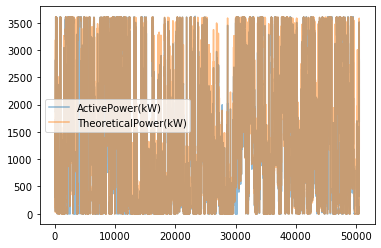

In [5]:
df[['ActivePower(kW)', 'TheoreticalPower(kW)']].plot(alpha=.5);

# Working with Timeseries

To work effectively with timeseries data, it can be valuable to convert the time column to a "DateTime" dtype.  This gives access to a some useful indexing and resampling techniques in Pandas.

https://pandas.pydata.org/docs/user_guide/timeseries.html

The most common function for creating DateTime types is [pandas.to_datetime()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_datetime.html).  It is particularly flexible when it comes to strings, and accepts [datetime format string codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) in its format argument.

In [6]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'],  format="%d %m %Y %H:%M")
df.set_index('Timestamp', inplace=True)
df.head()

,ActivePower(kW),WindSpeed(m/s),TheoreticalPower(kW),Wind_Direction
Timestamp,,,,
2018-01-01 00:00:00,380.047791,5.311336,416.328908,259.994904
2018-01-01 00:10:00,453.769196,5.672167,519.917511,268.641113
2018-01-01 00:20:00,306.376587,5.216037,390.900016,272.564789
2018-01-01 00:30:00,419.645905,5.659674,516.127569,271.258087
2018-01-01 00:40:00,380.650696,5.577941,491.702972,265.674286


In [7]:
df['2018-2-10 10:00': '2018-2-10 11:00']

,ActivePower(kW),WindSpeed(m/s),TheoreticalPower(kW),Wind_Direction
Timestamp,,,,
2018-02-10 10:00:00,75.004448,3.537383,56.298704,157.921295
2018-02-10 10:10:00,23.099831,3.122423,21.116524,158.443405
2018-02-10 10:20:00,60.629292,3.475180,49.269433,155.227600
2018-02-10 10:30:00,337.653290,4.968919,328.400531,162.837799
2018-02-10 10:40:00,236.829300,4.633758,250.861270,160.384796
2018-02-10 10:50:00,115.375298,3.980466,124.279977,147.095703
2018-02-10 11:00:00,69.750130,3.814075,95.067847,136.727097


## Resampling/Rolling DataFrames by DataTimes


Pandas.DataFrame.rolling: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html

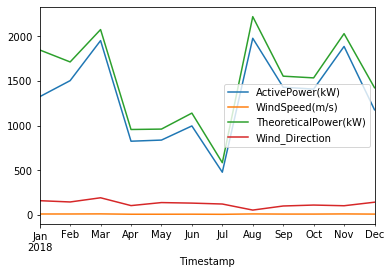

In [8]:
df.resample('1M').mean().plot();

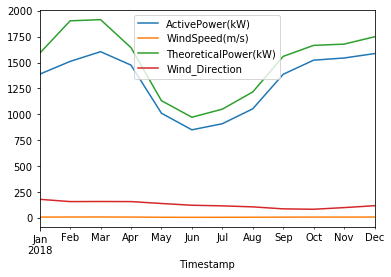

In [9]:
df.rolling('60D').mean().resample('1M').mean().plot();

# Signal Processing with Scipy-Signal

**Scipy-Signal**: https://docs.scipy.org/doc/scipy/reference/signal.html


In [10]:
from scipy import signal

### Rolling Average
scipy.signal.medfilt(): https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.medfilt.html#scipy.signal.medfilt

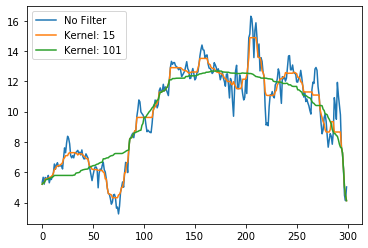

In [11]:
plt.plot(df['WindSpeed(m/s)'][:300].values, label='No Filter');
plt.plot(signal.medfilt(df['WindSpeed(m/s)'][:300], kernel_size=15), label='Kernel: 15');
plt.plot(signal.medfilt(df['WindSpeed(m/s)'][:300], kernel_size=101), label='Kernel: 101');
plt.legend();

#### Alternative Syntax: pd.Series.pipe(fun, \*args, \*\*kwargs)

In [12]:
df['WindSpeed(m/s)'].pipe(signal.medfilt, kernel_size=101)

array([5.2160368 , 5.30604982, 5.31133604, ..., 4.50504923, 4.50237799,
       4.47836781])

## Distribution Fitting

Scipy-Stats: https://docs.scipy.org/doc/scipy/reference/stats.html

### Weibulls

Weibull Distribution: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.weibull_min.html

Pres: https://docs.google.com/presentation/d/1wn_yIyciH-WWrjz_Fo5kMUx8VPXrI22ptE8AaN-XWms/edit#slide=id.g20f3b42769_0_527

In [13]:
from scipy.stats import weibull_min

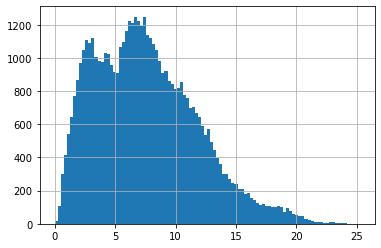

In [14]:
df['WindSpeed(m/s)'].hist(bins=100);

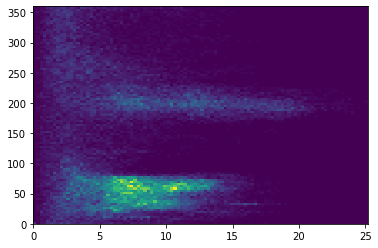

In [15]:
plt.hist2d(df['WindSpeed(m/s)'], df['Wind_Direction'], bins=100);

In [16]:
params = weibull_min.fit(df['WindSpeed(m/s)'])
fit_model = weibull_min(*params)
fit_model

D:\Nick\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


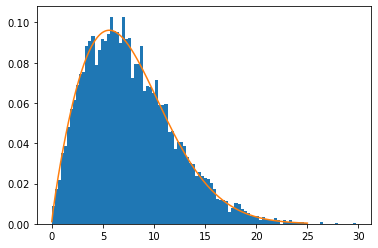

In [17]:
plt.hist(fit_model.rvs(10000), bins=100, normed=True);
x = np.linspace(0, 25, 200)
plt.plot(x, fit_model.pdf(x));

D:\Nick\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


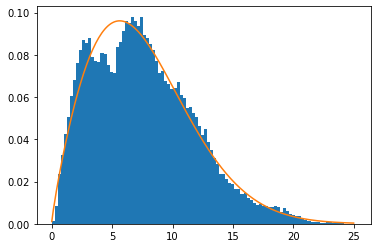

In [18]:
plt.hist(df['WindSpeed(m/s)'], bins=100, normed=True);
x = np.linspace(0, 25, 200)
plt.plot(x, fit_model.pdf(x));

D:\Nick\Miniconda3\lib\site-packages\ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


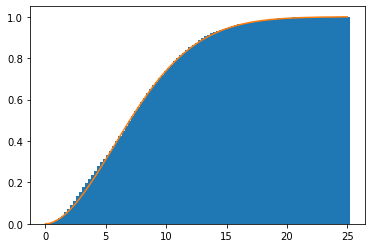

In [19]:
plt.hist(df['WindSpeed(m/s)'], bins=100, normed=True, cumulative=True);
x = np.linspace(0, 25, 200)
plt.plot(x, fit_model.cdf(x));

## Curve Fitting: Power Curve

· Power curve, residuals (Saskia)






In [20]:
import matplotlib.colors as mcolors

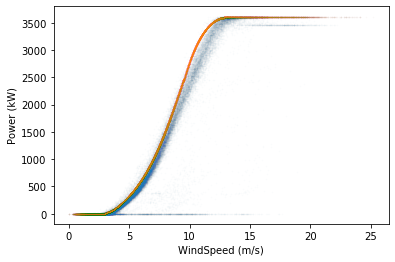

In [21]:
plt.scatter(df['WindSpeed(m/s)'], df['ActivePower(kW)'], s=.07, alpha=.03, label='Active Power');
plt.scatter(df['WindSpeed(m/s)'], df['TheoreticalPower(kW)'], s=.07, alpha=.03, label='Theoretical Power');
plt.xlabel('WindSpeed (m/s)');
plt.ylabel('Power (kW)');

#### With a custom function

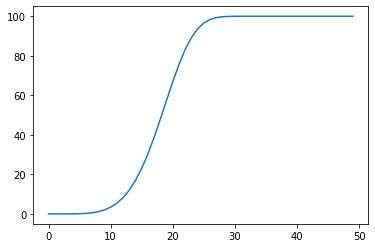

In [22]:
def weibull_dist(x, lamb, kappa, scale):
    # Weibull cdf function: https://en.wikipedia.org/wiki/Weibull_distribution
    return (1 - (np.e ** -((x/lamb) ** kappa) )) * scale

plt.plot(weibull_dist(np.linspace(0, 2.5), 1, 5, 100))

Curve fit: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html#scipy.optimize.curve_fit

In [23]:
from scipy import optimize
params, pcov = optimize.curve_fit(weibull_dist, df['WindSpeed(m/s)'], df['ActivePower(kW)'])
params

array([   9.85160977,    3.83410834, 3530.77509387])

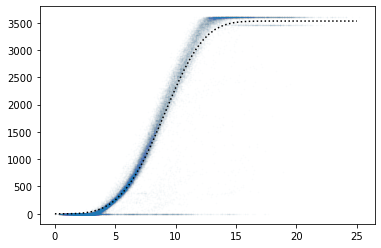

In [24]:
x = np.linspace(0, 25)
plt.scatter(df['WindSpeed(m/s)'], df['ActivePower(kW)'], s=.07, alpha=.03, label='Active Power');
plt.plot(x, weibull_dist(x, *params), 'k:');

## Pandas.DataFrame.Apply

The apply() method of DataFrames is used to create a functional programming style with Pandas and have a broadcasting-like interface without relying on array-aware functions.  

In short, instead of needing a list comprehension:

```python
df['new_column'] = [function(val) for val in df['old_column']]
```

one can write:

```python
df['new_column'] = df['old_column'].apply(function)
```

Besides being shorter to write and more computationally efficient, it also makes it simpler to chain multiple operations:

```python
(df['old_column']
 .apply(function1)
 .apply(function2)
 .plot()
)
```

#### Example: Converting Wind Direction to String

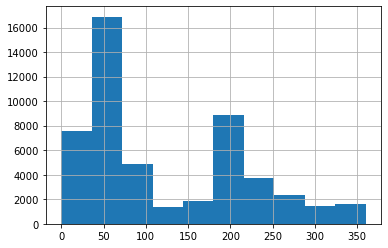

In [25]:
df['Wind_Direction'].hist()

In [26]:
def deg2dir(deg: float) -> str:
    if (0 <= deg <= 45) | (315 < deg <= 360):
        return "E"
    elif 45 < deg <= 135:
        return "N"
    elif 135 < deg <= 235:
        return "W"
    elif 235 < deg <= 315:
        return "S"
    else:
        raise ValueError("Deg {} out of range".format(deg))

df['WindDir'] = df['Wind_Direction'].apply(deg2dir)
df.sample(10)

,ActivePower(kW),WindSpeed(m/s),TheoreticalPower(kW),Wind_Direction,WindDir
Timestamp,,,,,
2018-05-03 07:00:00,0.000000,5.835814,570.992362,94.313873,N
2018-10-23 14:10:00,677.692322,6.499594,805.832180,55.812809,N
2018-07-08 20:10:00,24.783590,3.468241,48.523680,73.731956,N
2018-11-06 18:00:00,2778.455078,10.768790,3184.551083,53.692791,N
2018-01-19 02:50:00,1887.812012,8.006806,1533.896845,273.090302,S
2018-06-01 21:40:00,1374.777954,7.996407,1527.939822,54.204720,N
2018-05-26 16:40:00,3484.892090,12.910250,3597.238462,43.022812,E
2018-04-11 04:10:00,0.000000,2.061521,0.000000,158.412399,W
2018-01-07 06:30:00,3497.419922,15.967300,3600.000000,210.270096,W


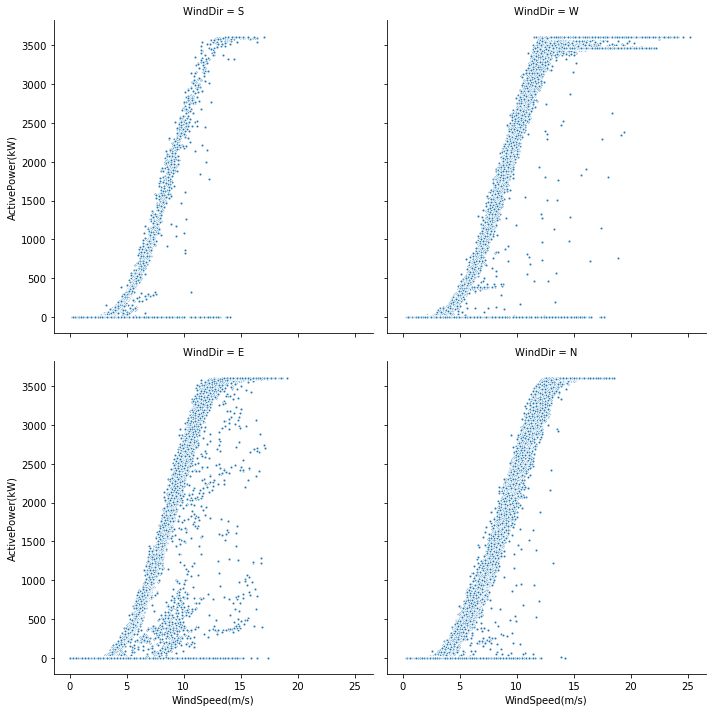

In [27]:
sns.relplot(data=df, x='WindSpeed(m/s)', y='ActivePower(kW)', col='WindDir', col_wrap=2, s=8);

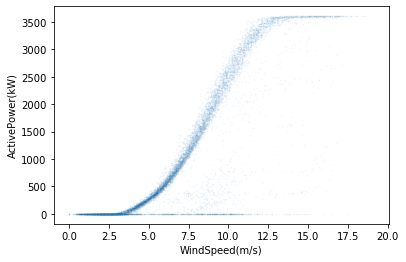

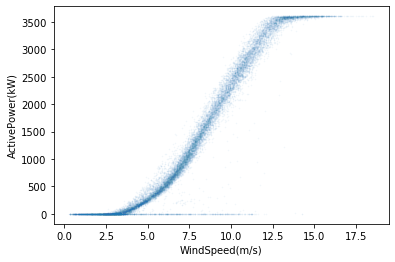

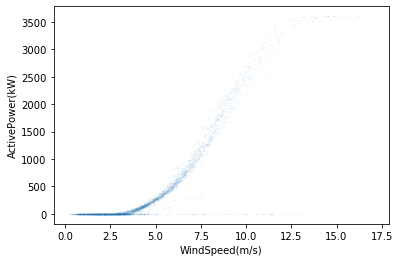

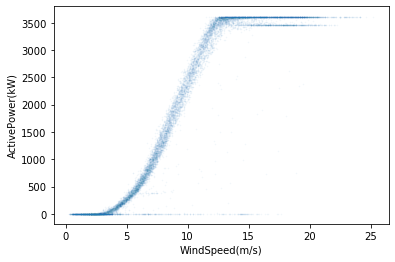

In [28]:
df.groupby('WindDir').plot.scatter(x='WindSpeed(m/s)', y='ActivePower(kW)', s=.3, alpha=.05);

### Aside: Fourier

Fourier Transform functions can be found in:
  - **Numpy.FFT**: https://docs.scipy.org/doc/numpy/reference/generated/numpy.fft.fft.html#numpy.fft.fft
  - **Scipy.fftpack**: https://docs.scipy.org/doc/scipy/reference/fftpack.html
  - **PyFFTW**: https://pypi.org/project/pyFFTW/

In [29]:
from numpy import fft

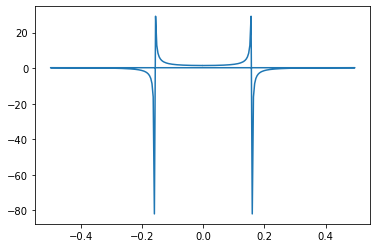

In [30]:
t = np.arange(256)
y = np.sin(t)
sp = np.fft.fft(y)
freq = np.fft.fftfreq(len(t))
plt.plot(freq, sp.real);

https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.spectrogram.html#scipy.signal.spectrogram

In [31]:
fs = 10e3
N = 1e5
amp = 2 * np.sqrt(2)
noise_power = 0.01 * fs / 2
time = np.arange(N) / float(fs)
mod = 500*np.cos(2*np.pi*0.25*time)
carrier = amp * np.sin(2*np.pi*3e3*time + mod)
noise = np.random.normal(scale=np.sqrt(noise_power), size=time.shape)
noise *= np.exp(-time/5)
x = carrier + noise

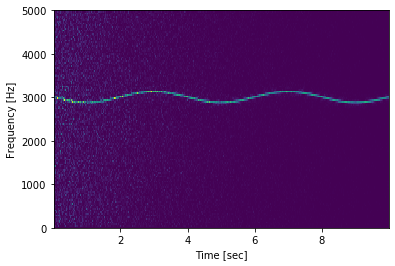

In [32]:
f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]');

# File Formats vs Data Formats

  - a "file format" describes how data is laid out on a computer.  It makes the data possible to access from a given computational envrionment, and contains basic information like the data's type, how it is referenced, and where metadata is stored.
    - csv, .mat and HDF5 are file formats.
  - A "data format" describes how data relates to one another by adding schema information to the format, as well as how to interpret different types of metadata, including units, comments, and alternate namings.  Analysis software can use this schema and the file format's interface to perform more advanced analysis in a semi-automated manner.
    - famos .dat files, netcdf, and schema'd databases are closer to data formats.
    
Building more descriptive data formats puts the complexity of the software into the data, rather than the parser/munger, which makes it simpler to write the data analysis code.  HDF5 has been a popular file format for building data formats because of its portability and ability to both store multiple datasets and metadata in a simple structure.

![](https://www.neonscience.org/sites/default/files/images/HDF5/hdf5_structure4.jpg)


### Browse HDF5 File

  - **ViTables**: https://vitables.org/
  - **HDF View**: 
    - (official, has login wall): https://www.hdfgroup.org/downloads/hdfview/
    - (unofficial): https://www.softpedia.com/get/Others/Miscellaneous/HDFView.shtml
  - **h5pyViewer**: https://pypi.org/project/h5pyViewer/
  
![](https://lh3.googleusercontent.com/proxy/weEnbyM1Rtbs8Oddb5pPFCZRTFXcZl7sRzBQFwKgj5pKfCtWikirorbX5rrGnHO7mKyRrCV8oWEjYCo8wMiMxSXnThkfDkKQZ4qfxlRJfD7K_nHg3kg0)

## Exporting from Pandas DataFrames to HDF5

### Load from CSV

In [33]:
df = pd.read_csv('T1.csv')
df.rename(columns={'Date/Time': 'Timestamp', 'LV ActivePower (kW)':'ActivePower(kW)',"Wind Speed (m/s)":"WindSpeed(m/s)","Wind Direction (°)":"Wind_Direction"},
                inplace=True)
df.head()

,Timestamp,ActivePower(kW),WindSpeed(m/s),Theoretical_Power_Curve (KWh),Wind_Direction
0,01 01 2018 00:00,380.047791,5.311336,416.328908,259.994904
1,01 01 2018 00:10,453.769196,5.672167,519.917511,268.641113
2,01 01 2018 00:20,306.376587,5.216037,390.900016,272.564789
3,01 01 2018 00:30,419.645905,5.659674,516.127569,271.258087
4,01 01 2018 00:40,380.650696,5.577941,491.702972,265.674286


### Store in HDF5

In [34]:
with h5py.File('WindData.h5', 'w') as f:
    
    # Put power data in one dataset
    power = df[['Timestamp', 'ActivePower(kW)', 'Theoretical_Power_Curve (KWh)']]
    recs = power.to_records(index=False, column_dtypes={'Timestamp': np.dtype('S30')})
    f.create_dataset('/power', data=recs)
    
    # Put wind data in another dataset
    wind = df[['Timestamp', 'WindSpeed(m/s)', 'Wind_Direction']]
    recs = wind.to_records(index=False, column_dtypes={'Timestamp': np.dtype('S30')})
    f.create_dataset('/wind', data=recs)

### Browse HDF5 File

  - **ViTables**: https://vitables.org/
  - **HDF View**: 
    - (official, has login wall): https://www.hdfgroup.org/downloads/hdfview/
    - (unofficial): https://www.softpedia.com/get/Others/Miscellaneous/HDFView.shtml
  - **h5pyViewer**: https://pypi.org/project/h5pyViewer/
  
![](https://lh3.googleusercontent.com/proxy/weEnbyM1Rtbs8Oddb5pPFCZRTFXcZl7sRzBQFwKgj5pKfCtWikirorbX5rrGnHO7mKyRrCV8oWEjYCo8wMiMxSXnThkfDkKQZ4qfxlRJfD7K_nHg3kg0)

### Load from HDF5

In [35]:
f = h5py.File('WindData.h5')
list(f.keys())

['power', 'wind']

In [36]:
f['/power']

<HDF5 dataset "power": shape (50530,), type "|V46">

In [37]:
power = f['power'][:]
power[:5]

array([(b'01 01 2018 00:00', 380.04779053, 416.32890782),
       (b'01 01 2018 00:10', 453.76919556, 519.91751106),
       (b'01 01 2018 00:20', 306.37658691, 390.90001581),
       (b'01 01 2018 00:30', 419.64590454, 516.12756898),
       (b'01 01 2018 00:40', 380.6506958 , 491.70297195)],
      dtype=[('Timestamp', 'S30'), ('ActivePower(kW)', '<f8'), ('Theoretical_Power_Curve (KWh)', '<f8')])

https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes

In [38]:
pdf = pd.DataFrame(power)
pdf['Timestamp'] = pdf.Timestamp.str.decode('utf8')
pdf['Timestamp'] = pd.to_datetime(pdf.Timestamp, format="%d %m %Y %H:%M")
pdf.set_index('Timestamp', inplace=True)
pdf.rename(columns={'Theoretical_Power_Curve (KWh)': 'ThoereticalPower(kW)'}, inplace=True)
pdf.head()

,ActivePower(kW),ThoereticalPower(kW)
Timestamp,,
2018-01-01 00:00:00,380.047791,416.328908
2018-01-01 00:10:00,453.769196,519.917511
2018-01-01 00:20:00,306.376587,390.900016
2018-01-01 00:30:00,419.645905,516.127569
2018-01-01 00:40:00,380.650696,491.702972


In [39]:
wind = f['wind'][:]
wdf = pd.DataFrame(wind)
wdf['Timestamp'] = wdf.Timestamp.str.decode('utf8')
wdf['Timestamp'] = pd.to_datetime(wdf.Timestamp, format="%d %m %Y %H:%M")
wdf.set_index('Timestamp', inplace=True)
wdf.rename(columns={'Theoretical_Power_Curve (KWh)': 'ThoereticalPower(kW)'}, inplace=True)
wdf.head()

,WindSpeed(m/s),Wind_Direction
Timestamp,,
2018-01-01 00:00:00,5.311336,259.994904
2018-01-01 00:10:00,5.672167,268.641113
2018-01-01 00:20:00,5.216037,272.564789
2018-01-01 00:30:00,5.659674,271.258087
2018-01-01 00:40:00,5.577941,265.674286


In [40]:
f.close()

## Merge the Two DataFrames

In [41]:
df = pd.merge(wdf, pdf, left_index=True, right_index=True)
df.head()

,WindSpeed(m/s),Wind_Direction,ActivePower(kW),ThoereticalPower(kW)
Timestamp,,,,
2018-01-01 00:00:00,5.311336,259.994904,380.047791,416.328908
2018-01-01 00:10:00,5.672167,268.641113,453.769196,519.917511
2018-01-01 00:20:00,5.216037,272.564789,306.376587,390.900016
2018-01-01 00:30:00,5.659674,271.258087,419.645905,516.127569
2018-01-01 00:40:00,5.577941,265.674286,380.650696,491.702972


## Exercise: Exporting from FAMOS

  1. **Export the Data**
  
    a. Open the .dat files in FAMOS
    
    b. Group the desired (all) variables.
    
    c. Export the group into a file type of your choosing (.mat 7.3 or hdf5)
    
  2. **Browse the Exported data.**
  
    a. Open the file in HDFView or Matlab
    
    b. Verify that the data is there and laid out identically.
    

## Loading Famos data

#### Working with .mat files

Python has limited support for older .mat file format versions, and with complex data they require quite a bit of python code to properly extract and re-serialize the data.  For newer versions (v7.3 and later), though, it is a completely different story.

#### scipy.io
For Matlab files v4 (Level 1.0), v6 and v7 to 7.2.

https://docs.scipy.org/doc/scipy/reference/tutorial/io.html

  - [loadmat()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html#scipy.io.loadmat)
  - [savemat()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.savemat.html#scipy.io.savemat)
  - [whosmat()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.whosmat.html#scipy.io.whosmat)
  

In [42]:
from scipy import io
data = io.loadmat('extra_data/dojo1_pandas/famostimeseries.mat', squeeze_me=False, )
list(data.keys())

['__header__',
 '__version__',
 '__globals__',
 'file03981441',
 'file039B1259',
 'file03A70149',
 'file03CL0806']

In [43]:
data['file039B1259'];

#### .Mat files v7.3 and up, though, are HDF5!

Let's create an HDF5 file by splitting the CSV file and saving it in a new HDF5 file, using the h5py package.  Once it's in the file, we'll then roundtrip the data by re-loading it and getting it back into Pandas.  

In [44]:
import h5py
f = h5py.File("extra_data/dojo1_pandas/03981441.mat")
list(f.keys())

['data']

In [45]:
print(list(f['data'].keys()))

['NWP_exponent', 'PFC', 'P_1', 'P_2', 'Pcons400', 'Pcons690', 'Prot', 'Pstat', 'Urot', 'WS_hor_sonic43', 'WS_hor_sonic80', 'WS_sonic43', 'WS_sonic80', 'acc_x_1', 'acc_x_2', 'acc_y_1', 'acc_y_2', 'baro', 'blM135_1', 'blM45_1', 'blM_edge_1', 'blM_edge_2', 'blM_flap_1', 'blM_flap_2', 'blM_in_plane_1', 'blM_in_plane_2', 'blM_out_of_plane_1', 'blM_out_of_plane_2', 'blMe_1', 'blMf_1', 'blTE1800_2', 'blTE3500_2', 'blT_2', 'blang_1', 'blang_2', 'blxMe_2', 'blxMf_2', 'conmode1_1', 'conmode1_2', 'conmode2_1', 'conmode2_2', 'genon_1', 'genon_2', 'hssT_1', 'mshM0_1', 'mshM0_2', 'mshM90_1', 'mshM90_2', 'mshM_tilt_1', 'mshM_tilt_2', 'mshM_yaw_1', 'mshM_yaw_2', 'mshT_1', 'mshT_2', 'nac_v_1', 'nac_v_2', 'nac_vdir_1', 'nac_vdir_2', 'piT_2', 'pitI_2', 'pitU_2', 'pitn_2', 'rotorpos_1', 'rotorpos_2', 'temp10', 'temp76', 'toM0_1', 'toM0_2', 'toM90_1', 'toM90_2', 'toM_roll_1', 'toM_roll_2', 'toM_tilt_1', 'toM_tilt_2', 'toT_1', 'toT_2', 'upflow_sonic43', 'upflow_sonic80', 'usonic43', 'usonic80', 'v20', 'v21'

In [46]:
f['data/acc_y_1']

<HDF5 dataset "acc_y_1": shape (30000,), type "<f8">

In [47]:
dict(f['data/acc_y_1'].attrs)

{'Tcreate': array([b'09/08/2003 14:41:36.203000'], dtype='|S26'),
 'Xdelta': array([0.02]),
 'Xoffset': array([0.]),
 'Comment': array([b''], dtype='|S1'),
 'Xunit': array([b's'], dtype='|S2'),
 'Unit': array([b'm/s^2'], dtype='|S6'),
 'Zoffset': array([0.])}

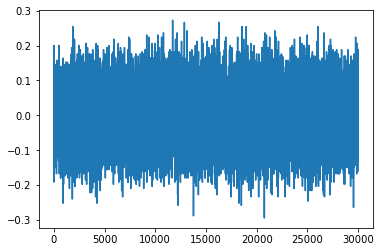

In [48]:
plt.plot(f['data/acc_y_1'][:]);

In [49]:
f.close()

### Importing to Pandas: Adding a Datetime index
This plot shows that we have the data, but haven't integrated the metadata yet.  Let's do that with Pandas, generating a DatatimeIndex from the provided information using the [pandas.data_range()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.date_range.html) function.

In [50]:
f = h5py.File("extra_data/dojo1_pandas/03981441.mat")
dataset = f['data/acc_y_1']
dataset, dict(dataset.attrs)

(<HDF5 dataset "acc_y_1": shape (30000,), type "<f8">,
 {'Tcreate': array([b'09/08/2003 14:41:36.203000'], dtype='|S26'),
  'Xdelta': array([0.02]),
  'Xoffset': array([0.]),
  'Comment': array([b''], dtype='|S1'),
  'Xunit': array([b's'], dtype='|S2'),
  'Unit': array([b'm/s^2'], dtype='|S6'),
  'Zoffset': array([0.])})

In [51]:
dataset.attrs["Tcreate"][0].decode()

'09/08/2003 14:41:36.203000'

In [52]:
from pathlib import Path
import pandas as pd

acc_y_1 = pd.Series(
    name=Path(dataset.name).name,
    data=dataset[:],
    index=pd.date_range(
        start=dataset.attrs["Tcreate"][0].decode(),
        periods=len(dataset),
        freq=pd.Timedelta(
            value=dataset.attrs['Xdelta'][0], 
            unit=dataset.attrs['Xunit'][0].decode())
    )
)
pd.DataFrame(acc_y_1).head()

,acc_y_1
2003-09-08 14:41:36.203,-0.004810
2003-09-08 14:41:36.223,0.109818
2003-09-08 14:41:36.243,0.067588
2003-09-08 14:41:36.263,0.013294
2003-09-08 14:41:36.283,0.085691


In [53]:
def series_from_datasets(dsets):
    for dataset in dsets:
        yield pd.Series(
            name=Path(dataset.name).name,
            data=dataset[:],
            index=pd.date_range(
                name="timestamp",
                start=dataset.attrs["Tcreate"][0].decode(),
                periods=len(dataset),
                freq=pd.Timedelta(
                    value=dataset.attrs['Xdelta'][0], 
                    unit=dataset.attrs['Xunit'][0].decode())
            )
        )
        
df = pd.DataFrame(series_from_datasets([f['data/acc_y_1'], f['data/acc_y_2'], f['data/acc_x_1'], f['data/acc_x_2']])).T
df.head()

,acc_y_1,acc_y_2,acc_x_1,acc_x_2
timestamp,,,,
2003-09-08 14:41:36.203000,-0.004810,NaN,0.012393,NaN
2003-09-08 14:41:36.204500,NaN,-0.047742,NaN,0.080197
2003-09-08 14:41:36.223000,0.109818,NaN,0.024513,NaN
2003-09-08 14:41:36.224500,NaN,0.023046,NaN,0.314588
2003-09-08 14:41:36.243000,0.067588,NaN,0.109317,NaN
